In [2]:
import pandas as pd
import numpy as np
import numpy.random as nr
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
Features = np.array(pd.read_csv("../data/automobile_data_price/Auto_Data_Features.csv"))
Labels = np.array(pd.read_csv("../data/automobile_data_price/Auto_Data_Labels.csv"))
Labels = np.log(Labels)
scaler = StandardScaler()
Labels = scaler.fit_transform(Labels)
Auto_Data = np.concatenate((Features,Labels), 1)
print(Auto_Data.shape)
Auto_Data

(195, 46)


array([[-1.68343913, -0.43850391, -0.83974908, ...,  0.        ,
         0.        ,  0.34521297],
       [-1.68343913, -0.43850391, -0.83974908, ...,  0.        ,
         0.        ,  0.73642824],
       [-0.71880285, -0.24564626, -0.18154782, ...,  0.        ,
         0.        ,  0.73642824],
       ...,
       [ 1.66826319,  1.16864321,  1.41694095, ...,  1.        ,
         0.        ,  1.23802415],
       [ 1.66826319,  1.16864321,  1.41694095, ...,  1.        ,
         0.        ,  1.32187438],
       [ 1.66826319,  1.16864321,  1.41694095, ...,  1.        ,
         0.        ,  1.33470024]])

In [4]:
auto_prices = pd.read_csv('../data/automobile_data_price/Automobile price data _Raw_.csv')

def clean_auto_data(auto_prices):
    'Function to load the auto price data set from a .csv file' 
    ## Remove rows with missing values, accounting for mising values coded as '?'
    cols = ['price', 'bore', 'stroke', 
          'horsepower', 'peak-rpm']
    for column in cols:
        auto_prices.loc[auto_prices[column]=='?',column] = np.nan
    auto_prices.dropna(axis=0,inplace=True)
    ## Convert some columns to numeric values
    for column in cols:
        auto_prices[column] = pd.to_numeric(auto_prices[column])
        
     ## fix column names so the '-' character becomes '_'
    cols = auto_prices.columns
    auto_prices.columns = [ str.replace('-','_') for str in cols]
    return auto_prices
auto_prices = clean_auto_data(auto_prices)

print(auto_prices.columns)

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


In [5]:
#价格列应进行对数转换。 执行下面单元格中的代码：
auto_prices['price'] = np.log(auto_prices['price'])

### 最后一点需要准备，通过以下代码创建分配可视化的标记形状列表。 使用的键是燃料类型和排气的元组， 执行下面单元格中的代码以创建此列表。

In [6]:

marker_dic = {('gas','std'):'o', ('gas','turbo'):'s', ('diesel','std'):'x', ('diesel','turbo'):'^'}
markers = [marker_dic[(x,y)] for x,y in zip(auto_prices['fuel_type'], auto_prices['aspiration'])]

# 应用K-means聚类

In [16]:
nr.seed(2233)
col_dic = {0:'blue',1:'green',2:'orange',3:'gray',4:'magenta',5:'black'}
kmeans_2 = KMeans(n_clusters=2, random_state=0)
assignments_km2 = kmeans_2.fit_predict(Auto_Data)

assign_color_km2 = [col_dic[x] for x in assignments_km2]

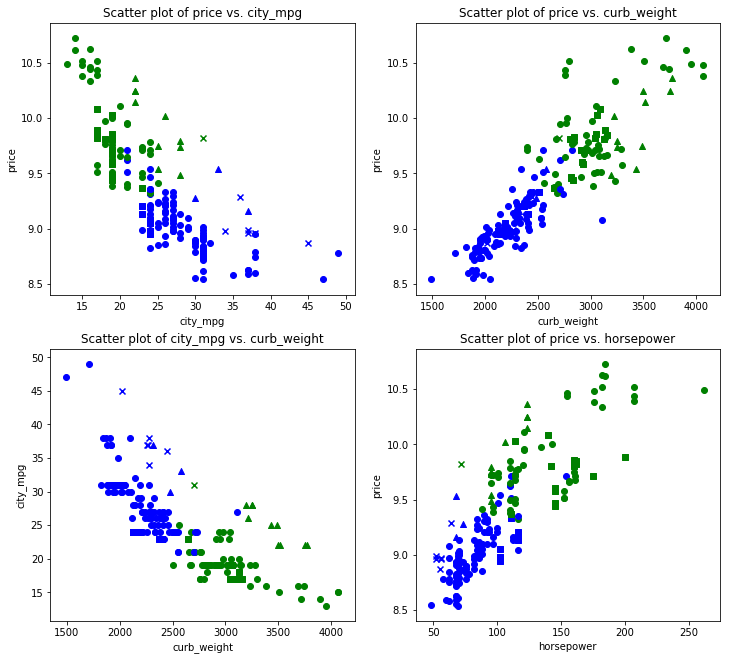

In [17]:
# 二 ，可视化
def plot_auto_cluster(auto_prices, assign_color, markers):
    fig, ax = plt.subplots(2, 2, figsize=(12,11)) # define plot area         
    x_cols = ['city_mpg', 'curb_weight', 'curb_weight', 'horsepower']
    y_cols = ['price', 'price', 'city_mpg', 'price']
    for x_col,y_col,i,j in zip(x_cols,y_cols,[0,0,1,1],[0,1,0,1]):
        for x,y,c,m in zip(auto_prices[x_col], auto_prices[y_col], assign_color, markers):
            ax[i,j].scatter(x,y, color = c, marker = m)
        ax[i,j].set_title('Scatter plot of ' + y_col + ' vs. ' + x_col) # Give the plot a main title
        ax[i,j].set_xlabel(x_col) # Set text for the x axis
        ax[i,j].set_ylabel(y_col)# Set text for y axis
    plt.show()
plot_auto_cluster(auto_prices,assign_color_km2,markers)

In [21]:
# k = 3 时候的聚类
nr.seed(4455)
kmeans_3 = KMeans(n_clusters=3, random_state=0)
assignments_km3 = kmeans_3.fit_predict(Auto_Data)

assign_color_km3 = [col_dic[x] for x in assignments_km3]

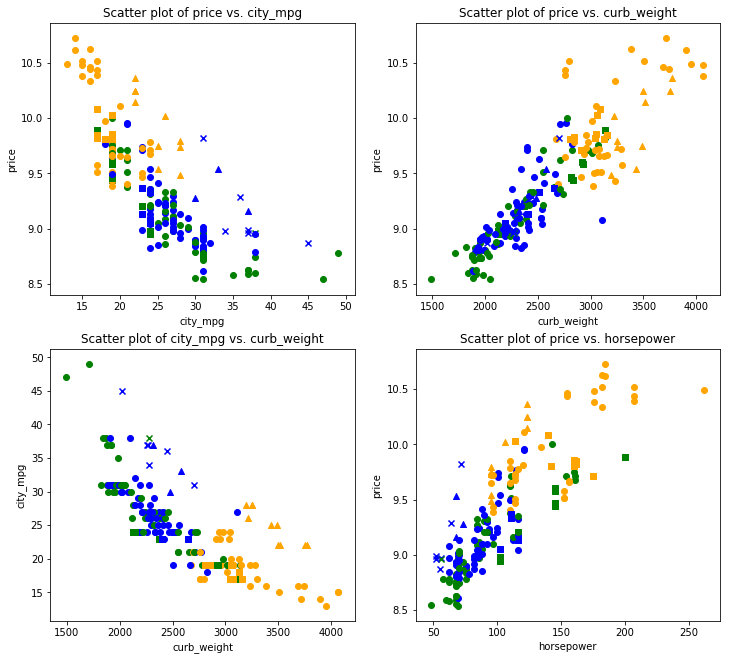

In [20]:
plot_auto_cluster(auto_prices,assign_color_km3,markers)

In [22]:
# k = 4 时候的聚类
nr.seed(4466)
kmeans_4 = KMeans(n_clusters=4, random_state=0)
assignments_km4 = kmeans_4.fit_predict(Auto_Data)

assign_color_km4 = [col_dic[x] for x in assignments_km4]

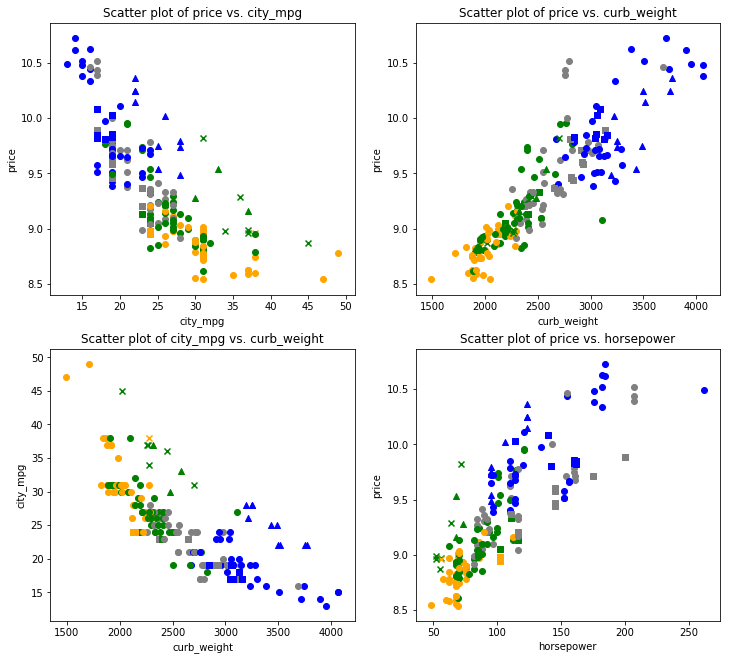

In [24]:
plot_auto_cluster(auto_prices,assign_color_km4,markers)

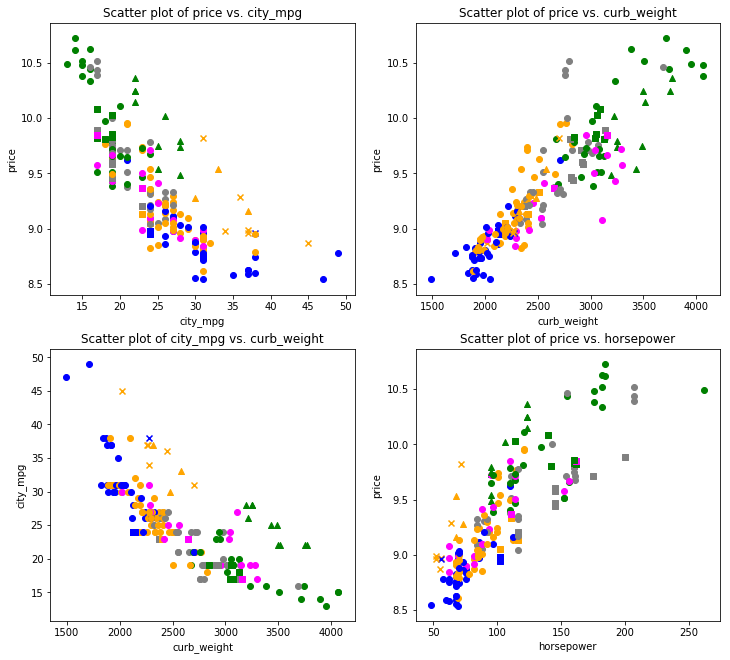

In [26]:
# k = 5 时候的聚类
nr.seed(4466)
kmeans_5 = KMeans(n_clusters=5, random_state=0)
assignments_km5 = kmeans_5.fit_predict(Auto_Data)

assign_color_km5 = [col_dic[x] for x in assignments_km5]
plot_auto_cluster(auto_prices,assign_color_km5,markers)

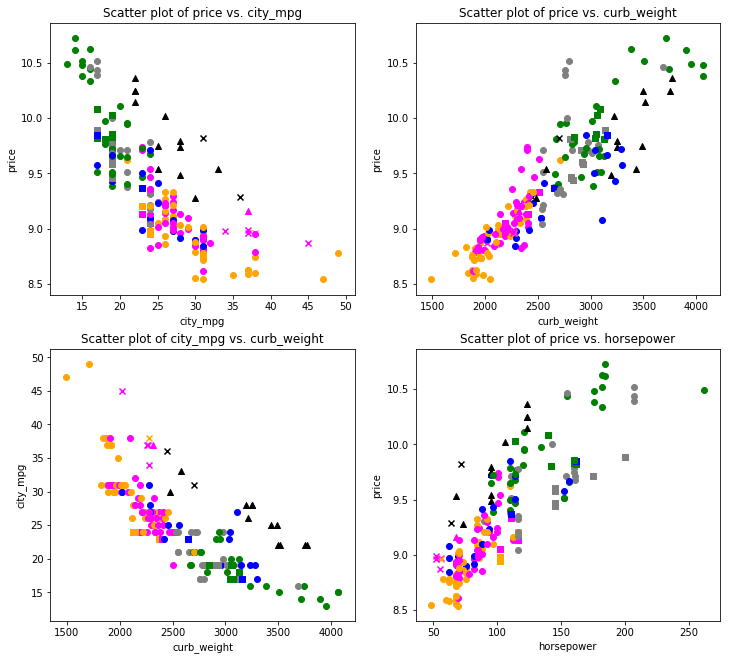

In [27]:
# k = 5 时候的聚类
nr.seed(4466)
kmeans_6 = KMeans(n_clusters=6, random_state=0)
assignments_km6 = kmeans_6.fit_predict(Auto_Data)

assign_color_km6 = [col_dic[x] for x in assignments_km6]
plot_auto_cluster(auto_prices,assign_color_km6,markers)

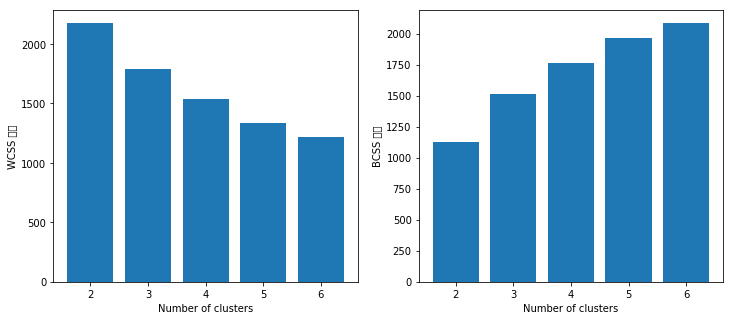

In [40]:
km_models = [kmeans_2,kmeans_3,kmeans_4,kmeans_5,kmeans_6]
def plot_WCSS_km(km_models,samples):
    fig ,ax = plt.subplots(1,2,figsize=(12,5))
    wcss = [mod.inertia_ for mod in km_models] #簇内的误差平和
    n_clusts = range(2,len(wcss) +2)
    ax[0].bar(n_clusts,wcss)
    ax[0].set_xlabel("Number of clusters")
    ax[0].set_ylabel("WCSS 簇内")
    n_1 = (float(samples.shape[0]) * float(samples.shape[1])) - 1.0
    tss = n_1 * np.var(samples)
    bcss = [tss -x for x in wcss] #簇间
    ax[1].bar(n_clusts,bcss)
    ax[1].set_xlabel("Number of clusters")
    ax[1].set_ylabel("BCSS 簇外")
    plt.show()
plot_WCSS_km(km_models,Auto_Data)   


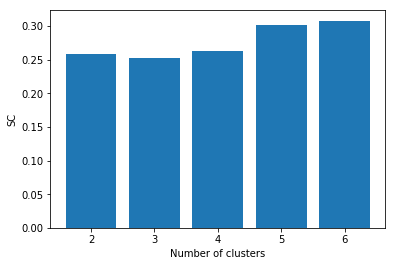

In [54]:
assignment_list = [assignments_km2, assignments_km3, assignments_km4, assignments_km5, assignments_km6] # 每个k 的聚类结果

def plot_sillohette(samples, assignments, x_lab = 'Number of clusters'):
    silhouette = [silhouette_score(samples, a) for a in assignments]
    n_clusts = range(2, len(silhouette) + 2)
    plt.bar(n_clusts, silhouette)
    plt.xlabel(x_lab)
    plt.ylabel('SC')
    #print(silhouette)
    plt.show()

plot_sillohette(Auto_Data, assignment_list)

NameError: name 'n_clusts' is not defined